In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_list_from_file(file_path):
    with open(file_path, 'r') as file:
        contents = file.readlines()
    
    # Process the contents to convert them into a list
    loaded_list = [item.strip() for item in contents]
    
    return loaded_list

In [3]:
def get_data_one_job(one_soup):
    
    try:
        title = one_soup.find("h1", {'class':'job-header-title'})
    except AttributeError:
        title = ''
    
    try:
        sal = one_soup.find('p', text=lambda text: text and ('Annually' in text or 'Monthly' in text))
        sal_text = sal.text.strip().replace('$', '').replace(',', '').split('.')[0]

        # check if salary is monthly
        if 'Monthly' in sal.text:
            sal_dec = int(sal_text) * 12  # convert to annual salary
        else: # if it's not monthly, it's assumed to be annual
            sal_dec = int(sal_text)
    
    except (AttributeError, IndexError) as error:
        sal = ""
    
    
    
    try:
        job_desc = one_soup.find("div", {"class":"job-details-content tab-content"})
        job_desc_text = job_desc.text
        job_desc_text = job_desc_text.translate(job_desc_text.maketrans("", "", "!$%&'()*,-./:;<=>?@[\]^`{|}~"))
        job_desc_text = job_desc_text.lower()
        job_desc_words = job_desc_text.split()
        
        #for word in job_desc_words:
         #      if word in keywords_programming.keys() or word in keywords_skills.keys():
          #      word_count[word] = word_count.get(word, 0) + 1

        counted_words = set()

        for word in job_desc_words:
            if word not in counted_words and (word in keywords_programming.keys() or word in keywords_skills.keys()):
                word_count[word] = word_count.get(word, 0) + 1
                counted_words.add(word)
    
    
    except (AttributeError, IndexError) as error:
       
        job_desc_words = ""
    
    return word_count

In [4]:
keywords_skills = {
    'airflow': 'Airflow', 'alteryx': 'Alteryx', 'aspnet': 'ASP.NET', 'atlassian': 'Atlassian', 
    'excel': 'Excel', 'powerbi': 'Power BI', 'tableau': 'Tableau', 'srss': 'SRSS', 'word': 'Word', 
    'unix': 'Unix', 'vue': 'Vue', 'jquery': 'jQuery', 'linuxunix': 'Linux / Unix', 'seaborn': 'Seaborn', 
    'microstrategy': 'MicroStrategy', 'spss': 'SPSS', 'visio': 'Visio', 'gdpr': 'GDPR', 'ssrs': 'SSRS', 
    'spreadsheet': 'Spreadsheet', 'aws': 'AWS', 'hadoop': 'Hadoop', 'ssis': 'SSIS', 'linux': 'Linux', 
    'sap': 'SAP', 'powerpoint': 'PowerPoint', 'sharepoint': 'SharePoint', 'redshift': 'Redshift', 
    'snowflake': 'Snowflake', 'qlik': 'Qlik', 'cognos': 'Cognos', 'pandas': 'Pandas', 'spark': 'Spark', 'outlook': 'Outlook'
}

In [5]:
keywords_programming = {
    'sql' : 'SQL', 'python' : 'Python', 'r' : 'R', 'c':'C', 'c#':'C#', 'javascript' : 'JavaScript', 'js':'JS', 'java':'Java', 
    'scala':'Scala', 'sas' : 'SAS', 'matlab': 'MATLAB', 'c++' : 'C++', 'perl' : 'Perl','go' : 'Go',
    'typescript' : 'TypeScript','bash':'Bash','html' : 'HTML','css' : 'CSS','php' : 'PHP','powershell' : 'Powershell',
    'rust' : 'Rust', 'kotlin' : 'Kotlin','ruby' : 'Ruby','dart' : 'Dart','assembly' :'Assembly',
    'swift' : 'Swift','vba' : 'VBA','lua' : 'Lua','groovy' : 'Groovy','delphi' : 'Delphi','objectivec' : 'Objective-C',
    'haskell' : 'Haskell','elixir' : 'Elixir','julia' : 'Julia','clojure': 'Clojure','solidity' : 'Solidity',
    'lisp' : 'Lisp','f#':'F#','fortran' : 'Fortran','erlang' : 'Erlang','apl' : 'APL','cobol' : 'COBOL',
    'ocaml': 'OCaml','crystal':'Crystal','javascripttypescript' : 'JavaScript / TypeScript','golang':'Golang',
    'nosql': 'NoSQL', 'mongodb' : 'MongoDB','tsql' :'Transact-SQL','vba' : 'Visual Basic',
    'pascal':'Pascal', 'mongo' : 'Mongo', 'plsql' : 'PL/SQL','sass' :'SASS', 'vbnet' : 'VB.NET','mssql' : 'MSSQL',
}

In [7]:
file_path = 'scraped_jobs.txt'
job_links = load_list_from_file(file_path)

In [8]:
word_count = {}
j_c = 1
for link in job_links:
    page = requests.get(link)
    #print(page.status_code)
    print(f"Scraping job number {j_c} out of {len(job_links)}")
    soup = BeautifulSoup(page.content, "html.parser") 
    j_c += 1
    j = get_data_one_job(soup)


Scraping job number 1 out of 14
Scraping job number 2 out of 14
Scraping job number 3 out of 14
Scraping job number 4 out of 14
Scraping job number 5 out of 14
Scraping job number 6 out of 14
Scraping job number 7 out of 14
Scraping job number 8 out of 14
Scraping job number 9 out of 14
Scraping job number 10 out of 14
Scraping job number 11 out of 14
Scraping job number 12 out of 14
Scraping job number 13 out of 14
Scraping job number 14 out of 14


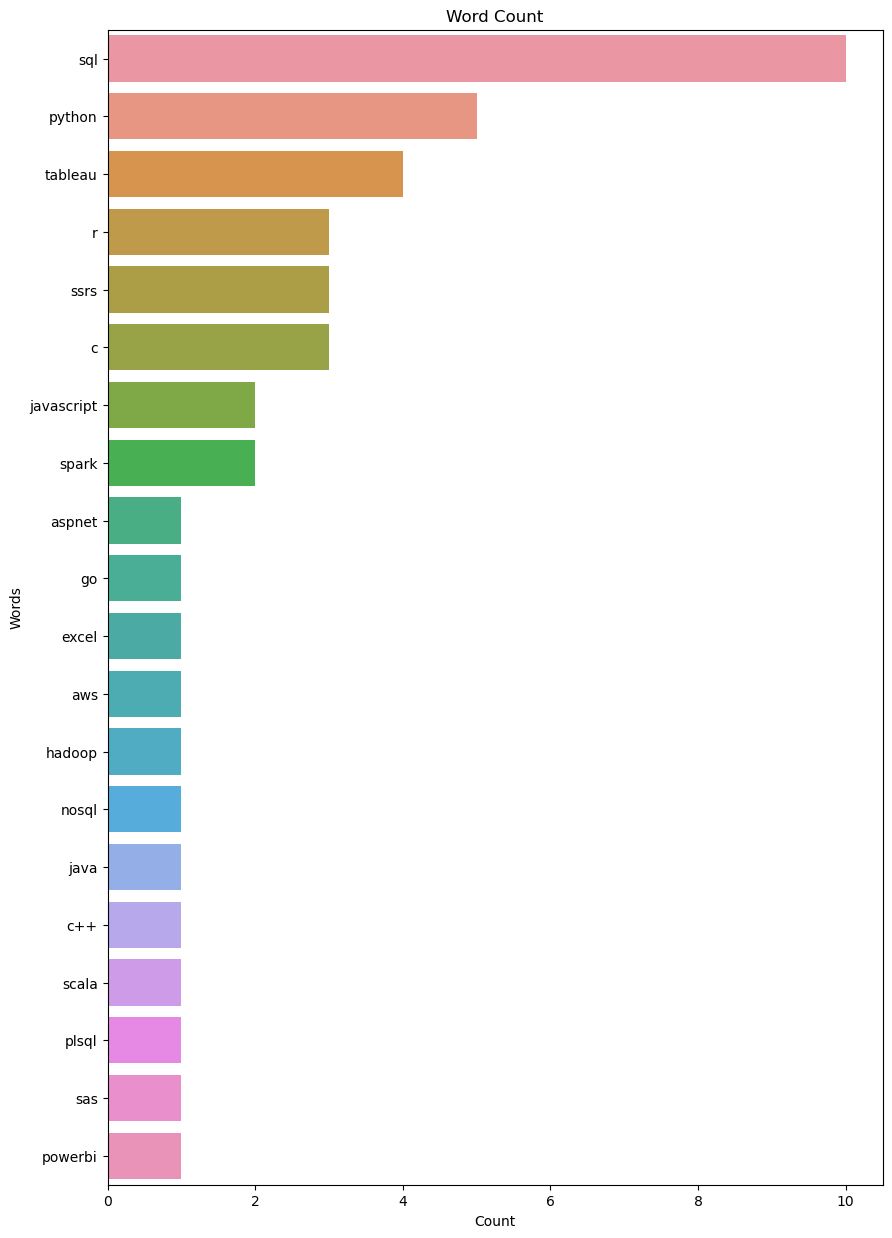

In [9]:
sorted_word_count = sorted(j.items(), key=lambda x: x[1], reverse=True)
sorted_words = [item[0] for item in sorted_word_count]
sorted_counts = [item[1] for item in sorted_word_count]

fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=sorted_counts, y=sorted_words, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Word Count')
plt.savefig('word_count_plot.pdf', format='pdf')